<a href="https://colab.research.google.com/github/christine99x/MasterCourseProject/blob/main/IDL/idl_A1(%E4%B8%8A%E5%82%B3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import pdist, squareform

# Data dimensionality, distance-based classifiers

1.1 center

Text(0.5, 1.0, 'Distance of Centers')

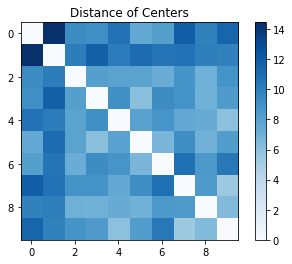

In [ ]:
#load data
df = pd.read_csv('train_in.csv', header=None)
l_train = pd.read_csv('train_out.csv', header=None)
l_train.columns = ['label']
data = df.join(l_train)

#calculate center
center = pd.DataFrame()
for i in range(10):
    center = center.append(data[data['label']==i].mean(), ignore_index=True)
del center['label']

#calculate distances
dist = pdist(center.values, metric='euclidean')

#show distances
plt.imshow(squareform(dist), cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Distance of Centers')
# print(np.around(squareform(dist), decimals=1))

1.2 dimentionality

Text(0.5, 1.0, 'LLE')

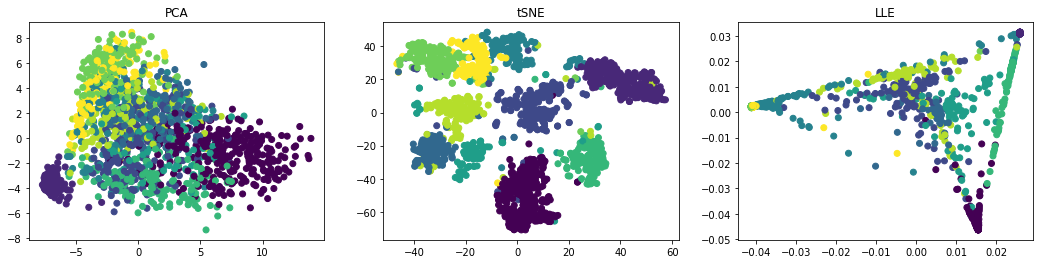

In [ ]:
plt.figure(figsize=(18,4))
#PCA
plt.subplot(131)
pca = PCA(n_components=2)
new = pca.fit_transform(data.iloc[:,:256].values)
plt.scatter(new[:,0], new[:,1], c=data['label'].values)
plt.title('PCA')
#tSNE
plt.subplot(132)
tsne = TSNE(n_components=2)
new = tsne.fit_transform(data.iloc[:,:256].values)
plt.scatter(new[:,0], new[:,1], c=data['label'].values)
plt.title('tSNE')
#LLE
plt.subplot(133)
lle = LocallyLinearEmbedding(n_components=2)
new = lle.fit_transform(data.iloc[:,:256].values)
plt.scatter(new[:,0], new[:,1], c=data['label'].values)
plt.title('LLE')

1.3 distance based classifier

In [ ]:
def distanceBasedClassifier(df, center):
    dist = np.zeros([df.shape[0],10])
    for i in range(10):
        for j in range(df.shape[0]):
            dist[j][i] = (np.sum((df.iloc[j,:].values - center.iloc[i,:].values) ** 2))**0.5 #calculate the distances to the 10 center
    return dist.argmin(axis=1)

# train
data['predict'] = distanceBasedClassifier(df,center)
print("train: ", accuracy_score(data['label'],data['predict']))
# test
test_f = pd.read_csv('test_in.csv', header=None)
test_l = pd.read_csv('test_out.csv', header=None)
test_l.columns = ['label']
test_l['predict'] = distanceBasedClassifier(test_f,center)
print("test: ", accuracy_score(test_l['label'],test_l['predict']))

train:  0.8635032220269478
test:  0.804


1.4 KNN & Confusion Matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


train:  0.9789103690685413
test:  0.914


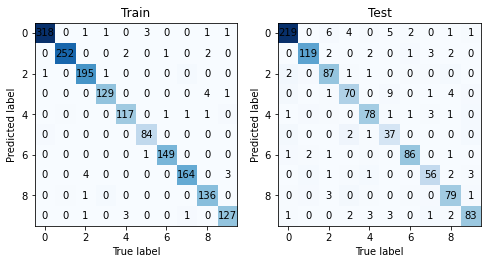

In [ ]:
def drawConfusionMatrix(cm):
    plt.imshow(cm, cmap=plt.cm.Blues)
    for i in range(len(cm)):
        for j in range(len(cm)):
            plt.annotate(cm[i, j], xy=(i, j), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

knn = KNeighborsClassifier(n_neighbors=3).fit(df,l_train) #fit knn model
pre_train = knn.predict(df)                #get the predict label of training data
cm_train = confusion_matrix(l_train,pre_train)
pre_test = knn.predict(test_f)              #get the predict label of test data
cm_test = confusion_matrix(test_l['label'],pre_test)
plt.figure(figsize=(8,4))
plt.subplot(121)     #confusion martix of training data
drawConfusionMatrix(cm_train)
plt.title("Train")
plt.subplot(122)     #confusion martix of test data
drawConfusionMatrix(cm_test)
plt.title("Test")

# train
print("train: ", accuracy_score(l_train,pre_train))
# test
print("test: ", accuracy_score(test_l['label'],pre_test))

# Implement a multi-class perceptron algorithm

Single layer perceptron with 10 nodes

In [ ]:
training_times = 1000
alpha = 0.3
w = np.random.randn(10,df.shape[1]+1) * 0.01
x = data.iloc[:,:257].values
x[:,256] = 1
x = x.T #training data
y = np.zeros((10,1707))  #y true one-hot
for i in range(df.shape[0]):
  y[l_train.values[i][0]][i] = 1

def sigmoid(x):
  s = 1 / (1 + np.exp(-x))
  return s

for i in range(training_times): #update weights
  z = np.dot(w,x)
  a = sigmoid(z)
  cost = a-y
  w = w - alpha*np.dot(cost,x.T)/1707

y_pred = np.argmax(a, axis=0)
print("train: ", accuracy_score(l_train,y_pred))
test_f['bias'] = 1
x = test_f.values.T
z = np.dot(w,x)
a = sigmoid(z)
test_pred = np.argmax(a, axis=0)
print("test: ", accuracy_score(test_l['label'], test_pred))

train:  0.9923842999414177
test:  0.89


# Implement the XOR network and the Gradient Descent Algorithm

3.1

In [ ]:
# define a sigmoid function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# define the xor_net function
def xor_net(x1,x2,weights):
  newrow = np.zeros((1,x1.shape[1]))+1
  a = np.vstack([newrow,x1,x2])
  z1 = np.dot(weights[:2,:],a)
  s1 = sigmoid(z1)

  s2 = np.vstack([newrow,s1])
  z2 = np.dot(weights[2,:],s2)
  result = sigmoid(z2)

  # result of probability binarization
  result2 = result.copy()

  for i in range(x1.shape[1]):
    if result2[i] > 0.5:
      result2[i] = 1
    else:
      result2[i] = 0

  return result, result2

3.2

In [ ]:
# define mse function
def mse(weights):
  x1 = np.array([[0,0,1,1]])
  x2 = np.array([[0,1,0,1]])
  return ((xor_net(x1,x2,weights)[1] - np.array([[0,1,1,0]]))**2).mean()

3.3

In [ ]:
# define a mse gradient function
def grdmse(weights):
  x1 = np.array([[0,0,1,1]])
  x2 = np.array([[0,1,0,1]])
  a2 = xor_net(x1,x2,weights)[0]

  newrow = np.zeros((1,x1.shape[1]))+1
  X = np.vstack([newrow,x1,x2])

  a1 = sigmoid(np.dot(weights[:2,:], X))

  dw2 = np.dot(a2*(1-a2)*(a2-np.array([[0,1,1,0]])),np.vstack([newrow,a1]).swapaxes(0,1)) # derivative

  v1 = weights[2,:].reshape(3,1)
  v2 = a2-np.array([[0,1,1,0]])
  v = np.dot(v1, v2)

  dw1 = np.dot(v[1:,:]*a1*(1-a1), X.swapaxes(0,1))  # derivative

  return np.vstack([dw1,dw2])

3.4

In [ ]:
# gradient descent
weights = np.random.randn(3,3)
for i in range(100000):
  weights = weights - 0.1*grdmse(weights)
  print(mse(weights))
  # if mse(weights) == 0:
  #   print(i+1)
  #   break

串流輸出內容已截斷至最後 5000 行。
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

In [ ]:
# lazy approach
i = 0
for i in range(10000):
  weights = np.random.randn(3,3)
  if mse(weights) == 0:
    break
print(i+1)
print(weights)

49795
[[ 0.45963579  2.58372465  2.46123418]
 [-0.37251443  0.76181029  0.61948184]
 [-0.13461573  0.58630816 -0.66657928]]


tanh

In [ ]:
# define a tanh function
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def xor_net(x1,x2,weights):
  newrow = np.zeros((1,x1.shape[1]))+1
  a = np.vstack([newrow,x1,x2])
  z1 = np.dot(weights[:2,:],a)
  s1 = tanh(z1)

  s2 = np.vstack([newrow,s1])
  z2 = np.dot(weights[2,:],s2)
  result = tanh(z2)

  result2 = result.copy()

  for i in range(x1.shape[1]):
    if result2[i] > 0.5:
      result2[i] = 1
    else:
      result2[i] = 0

  return result, result2


def mse(weights):
  x1 = np.array([[0,0,1,1]])
  x2 = np.array([[0,1,0,1]])
  return ((xor_net(x1,x2,weights)[1] - np.array([[0,1,1,0]]))**2).mean()

def grdmse(weights):
  x1 = np.array([[0,0,1,1]])
  x2 = np.array([[0,1,0,1]])
  a2 = xor_net(x1,x2,weights)[0]

  newrow = np.zeros((1,x1.shape[1]))+1
  X = np.vstack([newrow,x1,x2])

  a1 = tanh(np.dot(weights[:2,:], X))

  dw2 = np.dot((1-a2**2)*(a2-np.array([[0,1,1,0]])),np.vstack([newrow,a1]).swapaxes(0,1))

  v1 = weights[2,:].reshape(3,1)
  v2 = a2-np.array([[0,1,1,0]])
  v = np.dot(v1, v2)

  dw1 = np.dot(v[1:,:]*(1-a1**2), X.swapaxes(0,1))

  return np.vstack([dw1,dw2])


weights = np.random.randn(3,3)
for i in range(100000):
  weights = weights - 0.01*grdmse(weights)
  print(mse(weights))

串流輸出內容已截斷至最後 5000 行。
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

ReLU

In [ ]:
# define relu function
def relu(x):
    return np.maximum(x,0) #x, axis=0

# define the derivative of relu
def grdrelu(x):
  return (x > 0)*1

def xor_net(x1,x2,weights):
  newrow = np.zeros((1,x1.shape[1]))+1
  a = np.vstack([newrow,x1,x2])
  z1 = np.dot(weights[:2,:],a)
  s1 = relu(z1)

  s2 = np.vstack([newrow,s1])
  z2 = np.dot(weights[2,:],s2)
  result = relu(z2)

  result2 = result.copy()

  for i in range(x1.shape[1]):
    if result2[i] > 0.5:
      result2[i] = 1
    else:
      result2[i] = 0

  return result, result2


def mse(weights):
  x1 = np.array([[0,0,1,1]])
  x2 = np.array([[0,1,0,1]])
  return ((xor_net(x1,x2,weights)[1] - np.array([[0,1,1,0]]))**2).mean()

def grdmse(weights):
  x1 = np.array([[0,0,1,1]])
  x2 = np.array([[0,1,0,1]])
  a2 = xor_net(x1,x2,weights)[0]

  newrow = np.zeros((1,x1.shape[1]))+1
  X = np.vstack([newrow,x1,x2])

  a1 = relu(np.dot(weights[:2,:], X))

  dw2 = np.dot(grdrelu(a2)*(a2-np.array([[0,1,1,0]])),np.vstack([newrow,a1]).swapaxes(0,1))

  v1 = weights[2,:].reshape(3,1)
  v2 = a2-np.array([[0,1,1,0]])
  v = np.dot(v1, v2)

  dw1 = np.dot(v[1:,:]*grdrelu(a1), X.swapaxes(0,1))

  return np.vstack([dw1,dw2])


weights = np.random.randn(3,3)
for i in range(10000):
  weights = weights - 0.01*grdmse(weights)
  print(mse(weights))

串流輸出內容已截斷至最後 5000 行。
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0